In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


In [226]:
df_lis = pd.read_csv('./listings.csv')

In [227]:
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [228]:
df_lis.shape

(3585, 95)

In [229]:
list(df_lis.columns );

In [230]:
#check the number of null values in the price columnn
df_lis["price"].isnull().value_counts()

False    3585
Name: price, dtype: int64

In [231]:
df_lis.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [232]:
#function to remove comma(,) and dollar from columns ($)
def replace_dollar(price ):
    '''
    INPUT 
    price as either a string or a NaN  with "$" and/or ","

    OUTPUT 
    prcie as a string or a NaN without "$"" or ","
     '''
    if type(price) == str:
        
        price =(price.replace("$", "")).replace("," ,"")
    else :
        pass 
    return price 

In [233]:
lst =["price", "security_deposit" , "cleaning_fee" ,"extra_people"]

#coverts the above columns from string  into a float 
format_col =   lambda  col : df_lis[col].apply(replace_dollar).astype(float)
for col in lst:
    
    df_lis[col]  = (format_col(col))
        

In [234]:
#selects the known quantitave variables for linear regression 
num_vars = df_lis[['bedrooms','guests_included','availability_365','review_scores_rating',\
                                   'calculated_host_listings_count', "security_deposit" ,"cleaning_fee",\
                                                "extra_people" ,"price"]]

In [235]:
num_vars.head()

,bedrooms,guests_included,availability_365,review_scores_rating,calculated_host_listings_count,security_deposit,cleaning_fee,extra_people,price
0,2.0,1,0,NaN,1,NaN,35.0,0.0,250.0
1,1.0,0,359,94.0,1,95.0,10.0,0.0,65.0
2,1.0,1,319,98.0,1,NaN,NaN,20.0,65.0
3,1.0,2,98,100.0,1,100.0,50.0,25.0,75.0
4,1.0,1,334,99.0,1,NaN,15.0,0.0,79.0


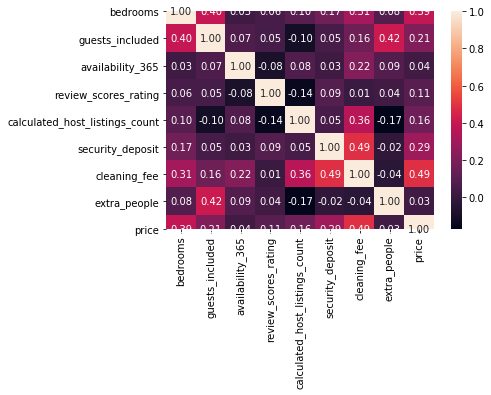

In [236]:
sns.heatmap(num_vars.corr(), annot=True, fmt=".2f")

In [237]:
num_vars.shape 

(3585, 9)

In [238]:
num_vars.isnull().mean ()

bedrooms                          0.002789
guests_included                   0.000000
availability_365                  0.000000
review_scores_rating              0.226778
calculated_host_listings_count    0.000000
security_deposit                  0.625662
cleaning_fee                      0.308787
extra_people                      0.000000
price                             0.000000
dtype: float64

In [239]:
#select categorical variables
cat_vars = df_lis.select_dtypes(include = ["object"])


In [240]:
cat_vars.head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,monthly_price,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",...,NaN,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
1,https://www.airbnb.com/rooms/3075044,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,...,NaN,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f
2,https://www.airbnb.com/rooms/6976,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...",...,"$1,350.00",5 days ago,2016-09-06,2009-07-19,2016-08-05,f,f,moderate,t,f
3,https://www.airbnb.com/rooms/1436513,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of th...,...,NaN,a week ago,2016-09-06,2016-08-28,2016-08-28,f,f,moderate,f,f
4,https://www.airbnb.com/rooms/7651065,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,From Logan Airport and South Station you have...,...,NaN,2 weeks ago,2016-09-06,2015-08-18,2016-09-01,f,f,flexible,f,f


In [241]:
#selects a subset of the categorical variable 
cat_cols =df_lis[[
 'host_is_superhost',
  'neighbourhood_cleansed',
  'property_type',
  'room_type',
  'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_phone_verification']]

In [242]:
cat_cols_lst = cat_cols.columns

In [243]:
#creates a dummy variable for the categorical variable 
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [244]:
new_cat = create_dummy_df(cat_cols,cat_cols_lst,True)

In [245]:
new_cat.head ()

,host_is_superhost_t,host_is_superhost_nan,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,...,room_type_nan,requires_license_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
#combine numerical and categorical variables 
data = (pd.concat([num_vars, new_cat],axis = 1 ))

In [247]:
data.head()

,bedrooms,guests_included,availability_365,review_scores_rating,calculated_host_listings_count,security_deposit,cleaning_fee,extra_people,price,host_is_superhost_t,...,room_type_nan,requires_license_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,2.0,1,0,NaN,1,NaN,35.0,0.0,250.0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,0,359,94.0,1,95.0,10.0,0.0,65.0,0,...,0,0,1,0,1,0,0,0,0,0
2,1.0,1,319,98.0,1,NaN,NaN,20.0,65.0,1,...,0,0,0,0,1,0,0,0,0,0
3,1.0,2,98,100.0,1,100.0,50.0,25.0,75.0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,1,334,99.0,1,NaN,15.0,0.0,79.0,1,...,0,0,0,0,0,0,0,0,0,0


In [248]:
new_cat.shape 

(3585, 52)

In [249]:
num_vars.shape 

(3585, 9)

In [250]:
data.head()

,bedrooms,guests_included,availability_365,review_scores_rating,calculated_host_listings_count,security_deposit,cleaning_fee,extra_people,price,host_is_superhost_t,...,room_type_nan,requires_license_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,2.0,1,0,NaN,1,NaN,35.0,0.0,250.0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,0,359,94.0,1,95.0,10.0,0.0,65.0,0,...,0,0,1,0,1,0,0,0,0,0
2,1.0,1,319,98.0,1,NaN,NaN,20.0,65.0,1,...,0,0,0,0,1,0,0,0,0,0
3,1.0,2,98,100.0,1,100.0,50.0,25.0,75.0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,1,334,99.0,1,NaN,15.0,0.0,79.0,1,...,0,0,0,0,0,0,0,0,0,0


In [251]:
data.shape 

(3585, 61)

In [252]:
data.head()

,bedrooms,guests_included,availability_365,review_scores_rating,calculated_host_listings_count,security_deposit,cleaning_fee,extra_people,price,host_is_superhost_t,...,room_type_nan,requires_license_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,2.0,1,0,NaN,1,NaN,35.0,0.0,250.0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,0,359,94.0,1,95.0,10.0,0.0,65.0,0,...,0,0,1,0,1,0,0,0,0,0
2,1.0,1,319,98.0,1,NaN,NaN,20.0,65.0,1,...,0,0,0,0,1,0,0,0,0,0
3,1.0,2,98,100.0,1,100.0,50.0,25.0,75.0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,1,334,99.0,1,NaN,15.0,0.0,79.0,1,...,0,0,0,0,0,0,0,0,0,0


In [253]:
fill_mean = lambda col : col.fillna(col.mean ())
data = data.apply (fill_mean , axis = 0 )

In [254]:
X = data.drop(["price"] ,axis = 1)
y = data['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train)
#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.28493799172069234 on 1076 values.'

In [255]:
y.shape

(3585,)